### We will use housing price dataset and try to create a predictive model without using additional libraries, only pure python.

In [1725]:
import numpy as np
import pandas as pd

####  Importing data 

In [1726]:
datX=np.load('x_train.npy')
datY=np.log(np.load('y_train.npy'))
datX=pd.DataFrame(datX, columns=datX.dtype.names)
datX

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2014-09-16,5.0,3.25,3710,34200,2.0,False,3,8,2510,1200,1986,0,98074,47.610100,-122.046997
1,2014-11-18,3.0,1.75,2820,8879,1.0,False,5,7,1540,1280,1920,1957,98146,47.509399,-122.375999
2,2014-11-10,3.0,1.00,1240,239144,1.0,False,3,6,1240,0,1921,1992,98038,47.430302,-122.045998
3,2015-04-16,4.0,2.50,2670,8279,2.0,False,3,7,2670,0,1999,0,98148,47.429199,-122.328003
4,2014-07-23,3.0,2.25,2700,4025,2.0,False,4,8,1760,940,1907,0,98122,47.607399,-122.293999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2014-05-21,4.0,2.75,2290,6120,2.0,False,4,7,2170,120,1926,0,98115,47.674599,-122.327003
14996,2015-04-01,3.0,2.00,1430,9250,1.0,False,4,8,990,440,1983,0,98052,47.695202,-122.096001
14997,2014-07-11,2.0,1.00,640,7768,1.0,False,3,6,640,0,1942,0,98106,47.514999,-122.359001
14998,2014-05-15,3.0,1.00,1630,10304,1.0,False,5,7,1630,0,1953,0,98155,47.754799,-122.317001


In [1727]:
datY

array([13.36138028, 13.031782  , 12.36307639, ..., 12.01370075,
       12.89921983, 12.9456262 ])

Okay, we manage to load the data (you can read more about the `load` [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html). But it is not a necessity). We are going to use linear models to work with it, but firstly we need to come up with idea what features should we include in the model at all (which feature the price is lineary dependent on):

Do not forget to install seaborn. You can do that by running `pip install seaborn` in the command line locally, or simply by running the next sell:

In [ ]:
!pip install seaborn

#### Let's plot features data using seaborn:

In [1729]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

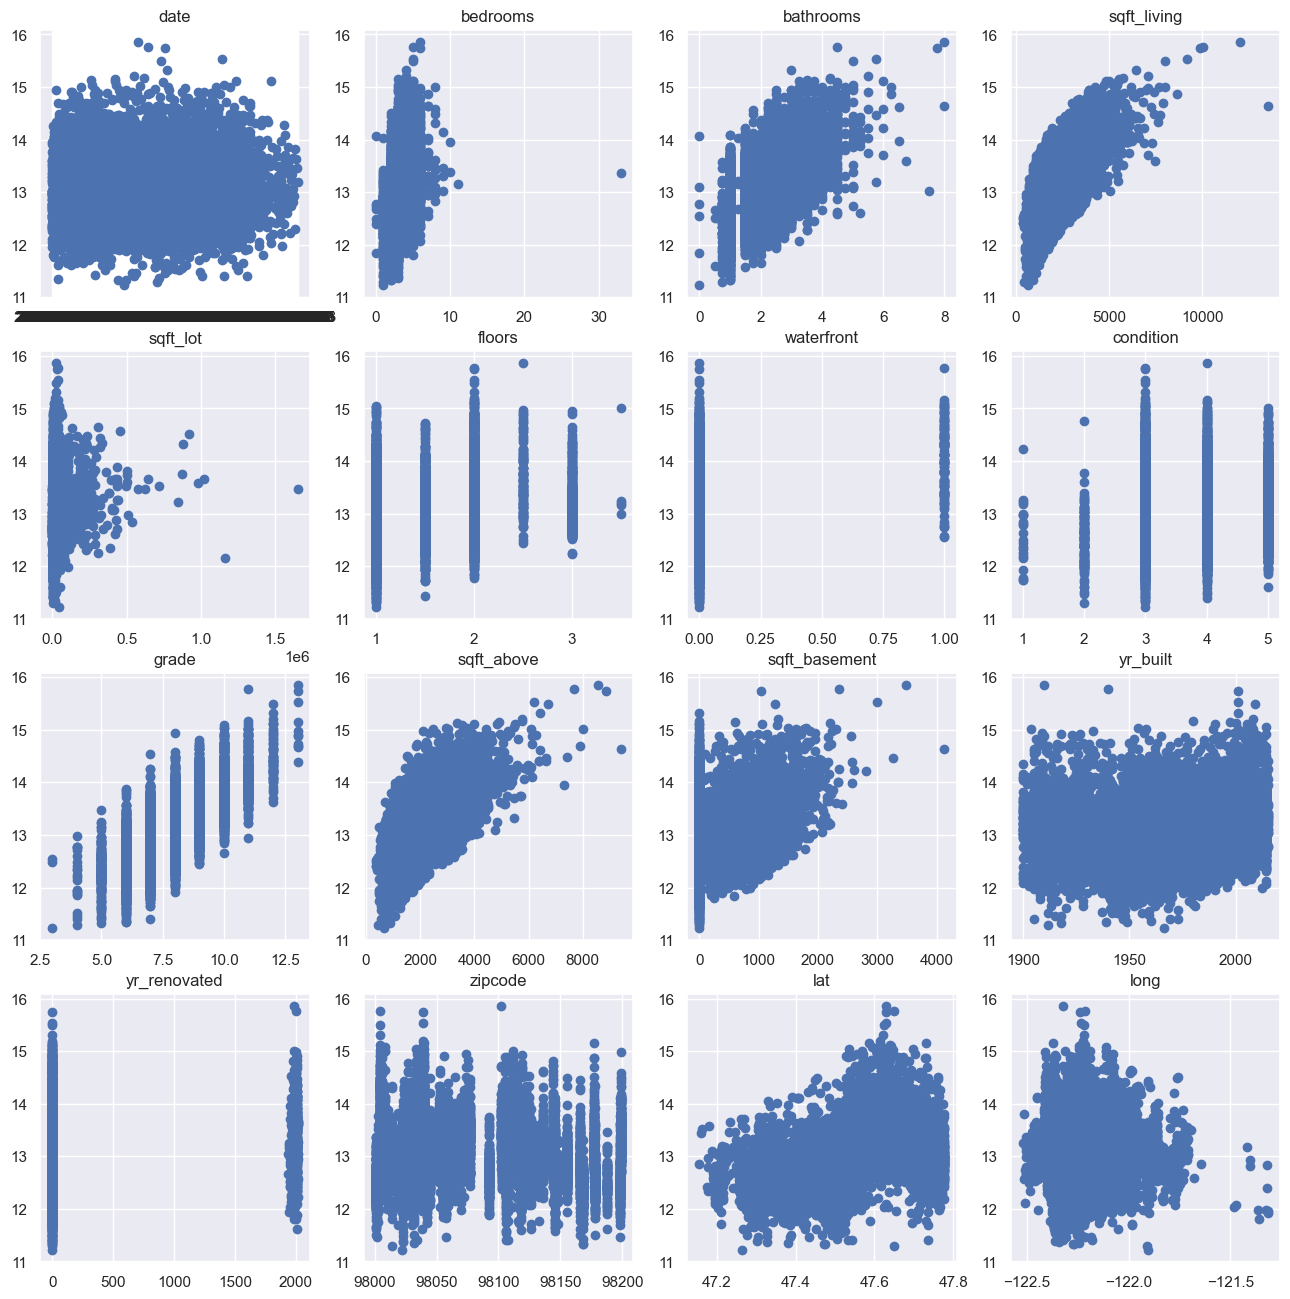

In [716]:
f, ax=plt.subplots(4, 4, figsize=(16,16))

for i, name in enumerate(datX.columns):
    ax[i//4][i%4].scatter(datX[name], datY)
    ax[i//4][i%4].set_title(name)

We will take few features, delete others and make matrices to use them further:

+ $X$, $x \in R$
+ $N$ - houses number
+ $m$ - used features number

In [1730]:
# First of all, delete unnecessary columns with '.drop()'
X = datX.drop(columns=['date', 'sqft_lot', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode'])

# The number of houses = numer of raws of the new data 'X'
N = X.shape[0]

# The number of new features = numer of colums of the new data 'X'
m = X.shape[1]

#### Let's see what we have now

In [1731]:
X

,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,lat,long
0,5.0,3.25,3710,2.0,3,8,2510,1200,47.610100,-122.046997
1,3.0,1.75,2820,1.0,5,7,1540,1280,47.509399,-122.375999
2,3.0,1.00,1240,1.0,3,6,1240,0,47.430302,-122.045998
3,4.0,2.50,2670,2.0,3,7,2670,0,47.429199,-122.328003
4,3.0,2.25,2700,2.0,4,8,1760,940,47.607399,-122.293999
...,...,...,...,...,...,...,...,...,...,...
14995,4.0,2.75,2290,2.0,4,7,2170,120,47.674599,-122.327003
14996,3.0,2.00,1430,1.0,4,8,990,440,47.695202,-122.096001
14997,2.0,1.00,640,1.0,3,6,640,0,47.514999,-122.359001
14998,3.0,1.00,1630,1.0,5,7,1630,0,47.754799,-122.317001


### Now we start to build our model using linear regression:

+ Input data: $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_N$
+ Target values for this input: $y_1, y_2, \ldots, y_N$

*Math interpretetion of the linear regression:*

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

*and MSE (mean squared error):*

$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2
$$

In [1733]:
def loss(w, X, y):
    
    # Our N value is the number of rows in X
    N = X.shape[0]
    
    # We need to add 1 column to X matrix to multiply it with w
    # In order to do it, let's make a new matrix
    additional_x = np.ones((N, 1))
    
    # And then concat them
    X_n = np.concatenate([additional_x, X], axis=1)
    
    # After that, we can multiply matrix x_n and w_n
    # It gives us y_i values (predicted)
    y_predicted_i = X_n.dot(w)
    
    # Now we can make our formula for lossValue
    lossValue = 1/N * np.sum(np.power((y - y_predicted_i), 2))
    
    return lossValue

#### Now we write a function to find the gradient descent of the loss function:

We will count all partial derivatives using matrices: 
$$
\nabla Loss = \begin{bmatrix}\frac{\partial L}{\partial w_o}\\ . . . \\ \frac{\partial L}{\partial w_m} \end{bmatrix} = 
\begin{bmatrix}\frac{\frac{1}{N}\partial \sum_{i=1}^N (y - \hat{y_i})^2}{\partial w_o}\\ . . . \\ \frac{\frac{1}{N}\partial \sum_{i=1}^N (y - \hat{y_i})^2}{\partial w_m} \end{bmatrix} =
\frac{1}{N}\begin{bmatrix}\frac{\partial \sum_{i=1}^N (y - \hat{y_i})^2}{\partial w_o}\\ . . . \\ \frac{\partial \sum_{i=1}^N (y - \hat{y_i})^2}{\partial w_m} \end{bmatrix} = 
\frac{1}{N}\begin{bmatrix} \sum_{i=1}^N (-2x_{0i})\cdot(y - \hat{y_i})\\ . . . \\ \sum_{i=1}^N (-2x_{1i})\cdot(y - \hat{y_i}) \end{bmatrix} = 
\frac{-2}{N}\begin{bmatrix} \sum_{i=1}^N x_{0i}(y - \hat{y_i})\\ . . . \\ \sum_{i=1}^N x_{1i}(y - \hat{y_i}) \end{bmatrix}
$$

So, we see that our partial derivatives differs by value of $x_i$. Note, that $\hat{y_i}$ here is $w\cdot X$.  
To transform this into matrix operation, we need to understand, that it is just a product of transponed matrix $X$ <i>(because in each row we multiply: 1) every 0 elements of all rows; 2) every 1 elements, etc.)</i> and matrix $(y - \hat{y_i})$ . But to get additional $x_0$ for the first element $w_0$ of the formula $ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $, we need to add colums with 1-s to the left side (because $w_0$ is the first element). Finally, we get: $\frac{-2}{N}(1, X)^T(Y-\hat{Y})$

In [1735]:
def grad(w_k, X, y):
    
    # Use our variables from previous function again
    N = X.shape[0]
    additional_x = np.ones((N, 1))
    X_n = np.concatenate([additional_x, X], axis=1)
    
    # First, we transpone our matrix X_n
    y_predicted_i = X_n.dot(w_k)
    X_T = np.transpose(X_n)
    
    # And then count our gradient of the Loss function
    lossGradient = -2/N * np.dot(X_T, (y - y_predicted_i))
    
    return lossGradient

#### Now we make the gradient descent:

Math interpretetion:
$$
\vec{w}^{k+1}=\vec{w}^{k}-\alpha_k\cdot \nabla Loss(\vec{w}^{k})
$$

In [1737]:
def gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2):
    
    losses=[]
    weights=[w_init]
    curiter=0
    w_k=weights[-1]
    
    # Condition to while is the number of current iteration
    while curiter < maxiter:
                
        # First, we define the next point 
        w_k = w_k - alpha * grad(w_k, X, y)
        
        # And count lossValue, gradient loss from previous functions
        lossValue_k = loss(w_k, X, y)
        gradient_loss = grad(w_k, X, y)
        
        # Adding to the lists
        weights.append(w_k)
        losses.append(lossValue_k)
        
        # Incrementing iteration
        curiter += 1
        
        # And if our gradient is bigger then epsilon - break the loop
        if np.linalg.norm(gradient_loss) < eps:
            break
        
    return weights, losses

1. First, let's try different values of alpha. For making this plots, we will take values of $w = (1, 1, 1)$.

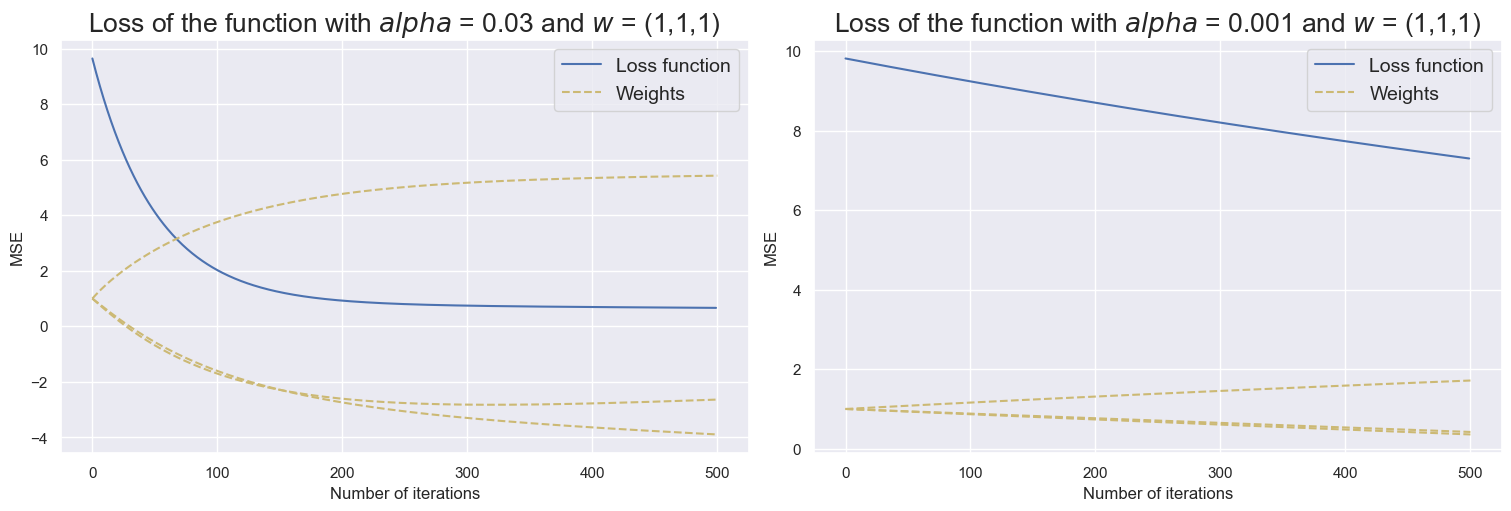

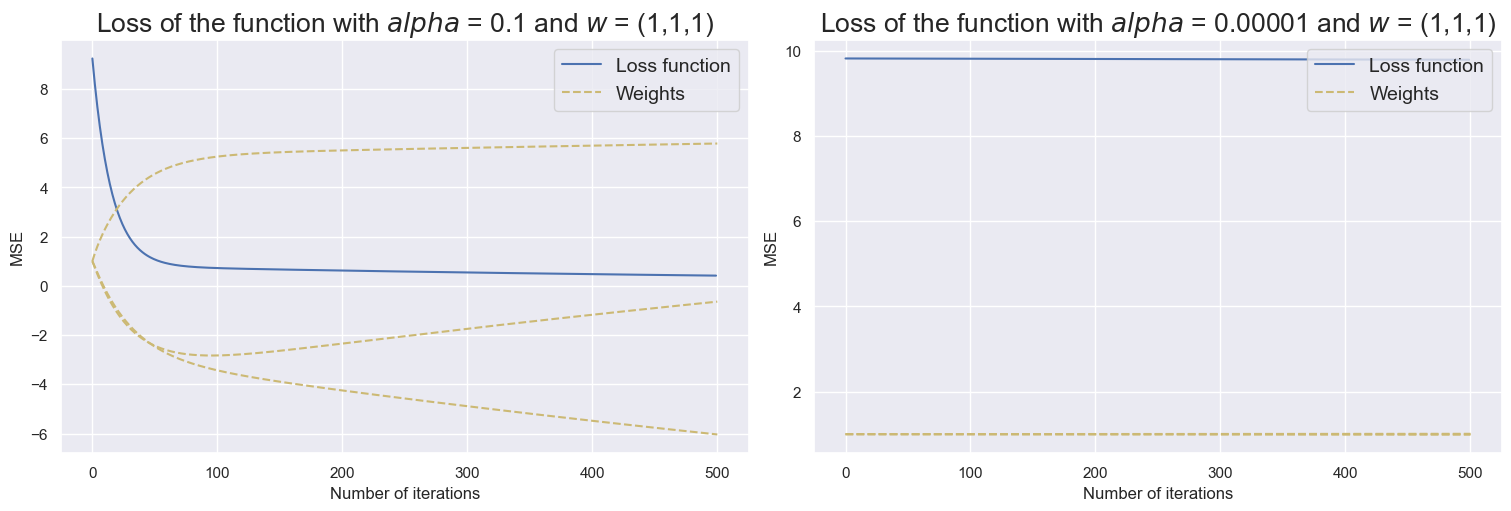

In [1740]:
# Setting for our subplots
plt.subplots(1, 2, figsize=(15, 5), layout='constrained')

# Let's use such a function: 7x^2 - 14x + 7
f = lambda x: (7*x**2-14*x+7)

# Creating x array to use in y values
x = np.random.random(size=25)

# Creating arrays of w, x and y
y = [f(x[i]) for i in range(len(x))]
X = np.array([x,x**2])
w_init = np.ones(3)

# Now we will choose different alpha values for each graph
alpha = 0.03
weights, losses = gradDescent(w_init, alpha, np.transpose(X), y, maxiter=500, eps=1e-2)

# Sublpot for alpha = 0.03
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss function')
plt.plot(weights, 'y--', label='Weights')
plt.xlabel('Number of iterations')
plt.ylabel('MSE')
plt.legend(['Loss function', 'Weights'], loc='upper right', prop={'size': 14})
plt.title('Loss of the function with $alpha$ = 0.03 and $w$ = (1,1,1)', size=19)

alpha = 0.001
weights, losses = gradDescent(w_init, alpha, np.transpose(X), y, maxiter=500, eps=1e-2)

# Sublpot for alpha = 0.001
plt.subplot(1, 2, 2)
plt.plot(losses, label='Loss function')
plt.plot(weights, 'y--', label='Weights')
plt.xlabel('Number of iterations')
plt.ylabel('MSE')
plt.legend(['Loss function', 'Weights'], loc='upper right', prop={'size': 14})
plt.title('Loss of the function with $alpha$ = 0.001 and $w$ = (1,1,1)', size=19)
plt.show()

plt.subplots(1, 2, figsize=(15, 5), layout='constrained')

alpha = 0.1
weights, losses = gradDescent(w_init, alpha, np.transpose(X), y, maxiter=500, eps=1e-2)

# Sublpot for alpha = 0.1
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss function')
plt.plot(weights, 'y--', label='Weights')
plt.xlabel('Number of iterations')
plt.ylabel('MSE')
plt.legend(['Loss function', 'Weights'], loc='upper right', prop={'size': 14})
plt.title('Loss of the function with $alpha$ = 0.1 and $w$ = (1,1,1)', size=19)

alpha = 0.00001
weights, losses = gradDescent(w_init, alpha, np.transpose(X), y, maxiter=500, eps=1e-2)

# Sublpot for alpha = 0.00001
plt.subplot(1, 2, 2)
plt.plot(losses, label='Loss function')
plt.plot(weights, 'y--', label='Weights')
plt.xlabel('Number of iterations')
plt.ylabel('MSE')
plt.legend(['Loss function', 'Weights'], loc='upper right', prop={'size': 14})
plt.title('Loss of the function with $alpha$ = 0.00001 and $w$ = (1,1,1)', size=19)
plt.show()

We see, that with different values of alpha, the losses also decrease with different speed. The fastest case is for the alpha == 0.1, loss becomes less then 1 for about ~ 60 iterations. In other words, it converges. And for very small alpha our losses don't descrease at all.  
Also, we see the dependence of the distance between weights and the successfulness of the model. 

2. Now let's take different values of our $w$, but for the same alpha. For example, let's take 0.03.

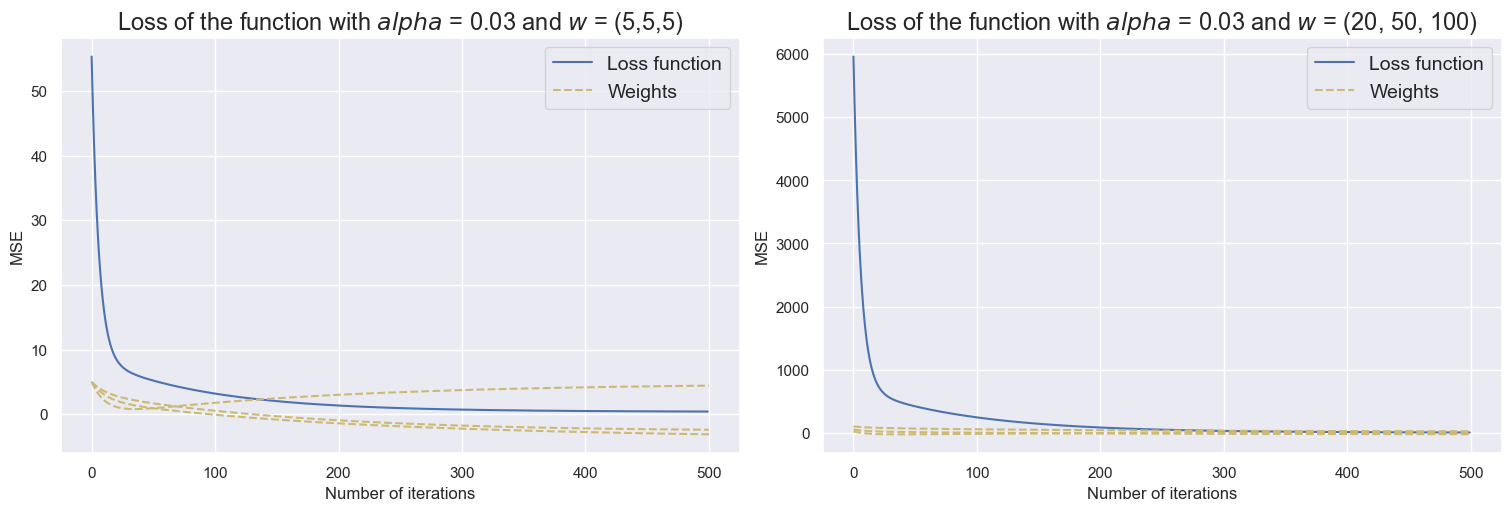

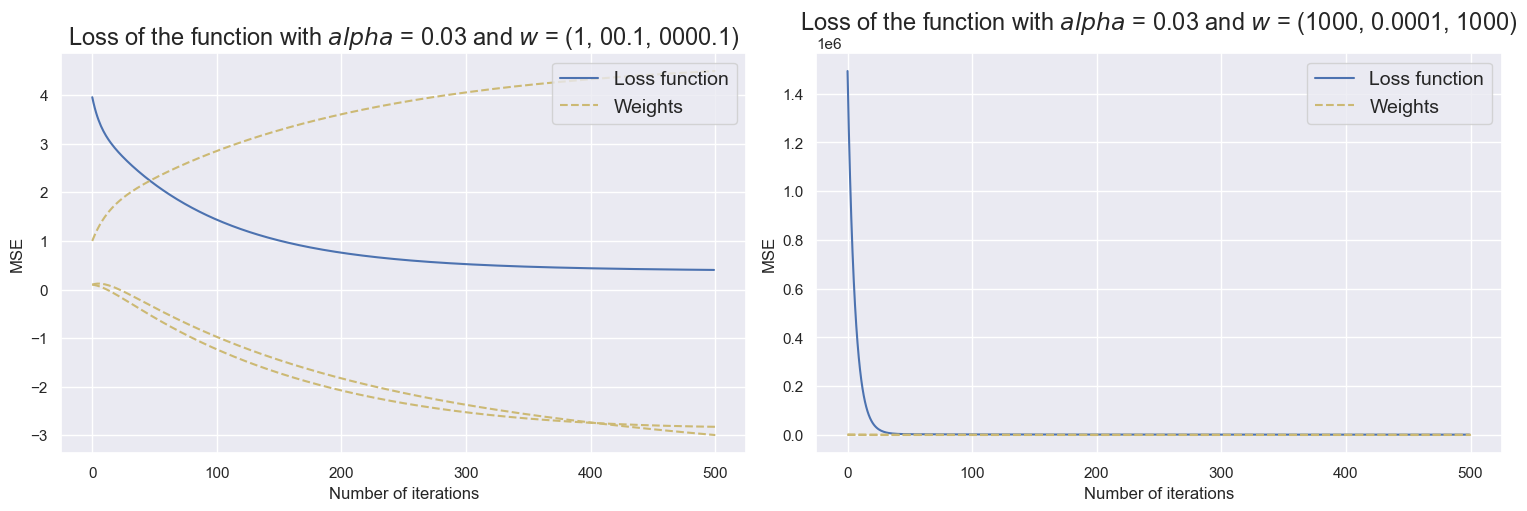

In [1741]:
# Setting for our subplots
plt.subplots(1, 2, figsize=(15, 5), layout='constrained')

# Let's use such a function: 7x^2 - 14x + 7
f = lambda x: (7*x**2-14*x+7)

# Creating x array to use in y values
x = np.random.random(size=25)

# Creating arrays of w, x and y
y = [f(x[i]) for i in range(len(x))]
X = np.array([x,x**2])
alpha = 0.03

w_init = np.array([5, 5, 5])
weights, losses = gradDescent(w_init, alpha, np.transpose(X), y, maxiter=500, eps=1e-2)

# Sublpot for w = (5, 5, 5)
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss function')
plt.plot(weights, 'y--', label='Weights')
plt.xlabel('Number of iterations')
plt.ylabel('MSE')
plt.legend(['Loss function', 'Weights'], loc='upper right', prop={'size': 14})
plt.title('Loss of the function with $alpha$ = 0.03 and $w$ = (5,5,5)', size=17)

w_init = np.array([20, 50, 100])
weights, losses = gradDescent(w_init, alpha, np.transpose(X), y, maxiter=500, eps=1e-2)

# Sublpot for w = (20, 50, 100)
plt.subplot(1, 2, 2)
plt.plot(losses, label='Loss function')
plt.plot(weights, 'y--', label='Weights')
plt.xlabel('Number of iterations')
plt.ylabel('MSE')
plt.legend(['Loss function', 'Weights'], loc='upper right', prop={'size': 14})
plt.title('Loss of the function with $alpha$ = 0.03 and $w$ = (20, 50, 100)', size=17)
plt.show()

plt.subplots(1, 2, figsize=(15, 5), layout='constrained')

w_init = np.array([1, 00.1, 0000.1])
weights, losses = gradDescent(w_init, alpha, np.transpose(X), y, maxiter=500, eps=1e-2)

# Sublpot for w = (1, 00.1, 0000.)
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss function')
plt.plot(weights, 'y--', label='Weights')
plt.xlabel('Number of iterations')
plt.ylabel('MSE')
plt.legend(['Loss function', 'Weights'], loc='upper right', prop={'size': 14})
plt.title('Loss of the function with $alpha$ = 0.03 and $w$ = (1, 00.1, 0000.1)', size=17)

w_init = np.array([1000, 0.0001, 1000])
weights, losses = gradDescent(w_init, alpha, np.transpose(X), y, maxiter=500, eps=1e-2)

# Sublpot for w = (1000, 0.0001, 1000)
plt.subplot(1, 2, 2)
plt.plot(losses, label='Loss function')
plt.plot(weights, 'y--', label='Weights')
plt.xlabel('Number of iterations')
plt.ylabel('MSE')
plt.legend(['Loss function', 'Weights'], loc='upper right', prop={'size': 14})
plt.title('Loss of the function with $alpha$ = 0.03 and $w$ = (1000, 0.0001, 1000)', size=17)
plt.show()

Let us check the adequacy of the model we created.

Choose several (no less then five) houses (inputs in your `X` matrix) and calculte predicted prices by:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

Let's see first if our model predicts well on some random data:

In [1742]:
# Taking random x,y data
X = np.array([[1, 4, 8], 
              [4, 3, 5], 
              [5, 4, 3],
             [5, 3, 6],
             [3, 1, 10],
             [2, 1, 1]])
y = np.array([[10], [6], [3], [7], [12], [1]])

w_init = np.ones((X.shape[1] + 1, 1))
a = 0.01
maxiter = 500
eps = 1e-2

# Making our prediction
weights, losses = gradDescent(w_init, a, X, y, maxiter, eps)

# Get the learned weight vector
w_learned = weights[-1]

# Predict the output for the input data using the learned weight vector
additional_x = np.ones((X.shape[0], 1))
X_n = np.concatenate([additional_x, X], axis=1)
predicted_output = np.dot(X_n, w_learned)

# Check the predicted output against the actual output
print("Predicted\tActual")
for i in range(len(predicted_output)):
    print(f"{predicted_output[i][0]:.2f}\t\t{y[i][0]}")

Predicted	Actual
10.03		10
5.79		6
3.16		3
6.84		7
12.11		12
1.24		1


We see, that predictions are quiet good. By the way, changing the number of iterations to the bigger value gives us better predicted results. Now let's try on our houses data. Also, let's try different values of $alpha$

In [1744]:
X = datX.drop(columns=['date', 'sqft_lot', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode'])[:5]
y = np.array([[datY[i]] for i in range (5)])

w_init = np.ones((X.shape[1] + 1, 1))
a = 0.00000001
maxiter = 500
eps = 1e-2

weights, losses = gradDescent(w_init, a, X, y, maxiter, eps)
w_learned = weights[-1]

additional_x = np.ones((X.shape[0], 1))
X_n = np.concatenate([additional_x, X], axis=1)
predicted_output = np.dot(X_n, w_learned)

print("Predicted\tActual")
for i in range(len(predicted_output)):
    print(f"{predicted_output[i][0]:.2f}\t\t{y[i][0]}")

Predicted	Actual
36.52		13.36138027787483
7.04		13.03178199917309
-30.47		12.363076394339839
13.73		12.936033799212835
8.07		13.222208712374044


So, with changed $alpha$ we have also really bad results. Let's try to delete some more colums. For example, with data where the numbers are quite big.

In [1745]:
X = datX.drop(columns=['date', 'sqft_living', 'sqft_basement', 'sqft_above', 'sqft_lot', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode', 'long', 'lat'])[:5]
y = np.array([[datY[i]] for i in range (5)])

w_init = np.ones((X.shape[1] + 1, 1))
a = 0.01
maxiter = 500
eps = 1e-2

weights, losses = gradDescent(w_init, a, X, y, maxiter, eps)
w_learned = weights[-1]

additional_x = np.ones((X.shape[0], 1))
X_n = np.concatenate([additional_x, X], axis=1)
predicted_output = np.dot(X_n, w_learned)

print("Predicted\tActual")
for i in range(len(predicted_output)):
    print(f"{predicted_output[i][0]:.2f}\t\t{y[i][0]}")

Predicted	Actual
13.71		13.36138027787483
13.27		13.03178199917309
11.85		12.363076394339839
12.57		12.936033799212835
13.36		13.222208712374044


Now we see, that our model predicts well. It means that our data is not enough preproceeded. But deleting so much columns in not convenient. So, we need to make few more transformations.

#### Data normalization. For this, we will have to use sklearn library:

In [1747]:
# We will use standard sklearn library
from sklearn import preprocessing

def norm(X):
    
    # Preprocessing and transforming our X
    scaler = preprocessing.StandardScaler().fit(X)
    X = scaler.transform(X)
    
    return X

Let's check if now our model predicts well with normalized data X. First, let's take the same $alpha$ == 0.01

In [1748]:
X = norm(datX.drop(columns=['date', 'sqft_lot', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode'])[:5])
y = np.array([[datY[i]] for i in range (5)])

w_init = np.ones((X.shape[1] + 1, 1))
a = 0.01
maxiter = 500
eps = 1e-2

weights, losses = gradDescent(w_init, a, X, y, maxiter, eps)
w_learned = weights[-1]

additional_x = np.ones((X.shape[0], 1))
X_n = np.concatenate([additional_x, X], axis=1)
predicted_output = np.dot(X_n, w_learned)

print("Predicted\tActual")
for i in range(len(predicted_output)):
    print(f"{predicted_output[i][0]:.2f}\t\t{y[i][0]}")

Predicted	Actual
13.36		13.36138027787483
13.03		13.03178199917309
12.36		12.363076394339839
12.93		12.936033799212835
13.21		13.222208712374044


We see good results! Data normalizing was really helpful in our case.

Now let's take another $alpha$ == 0.003.

In [1749]:
X = norm(datX.drop(columns=['date', 'sqft_lot', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode'])[:5])
y = np.array([[datY[i]] for i in range (5)])

w_init = np.ones((X.shape[1] + 1, 1))
a = 0.003
maxiter = 500
eps = 1e-2

weights, losses = gradDescent(w_init, a, X, y, maxiter, eps)
w_learned = weights[-1]

additional_x = np.ones((X.shape[0], 1))
X_n = np.concatenate([additional_x, X], axis=1)
predicted_output = np.dot(X_n, w_learned)

print("Predicted\tActual")
for i in range(len(predicted_output)):
    print(f"{predicted_output[i][0]:.2f}\t\t{y[i][0]}")

Predicted	Actual
12.82		13.36138027787483
12.48		13.03178199917309
11.78		12.363076394339839
12.32		12.936033799212835
12.56		13.222208712374044


And $alpha$ == 0.001.

In [1750]:
X = norm(datX.drop(columns=['date', 'sqft_lot', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode'])[:5])
y = np.array([[datY[i]] for i in range (5)])

w_init = np.ones((X.shape[1] + 1, 1))
a = 0.001
maxiter = 500
eps = 1e-2

weights, losses = gradDescent(w_init, a, X, y, maxiter, eps)
w_learned = weights[-1]

additional_x = np.ones((X.shape[0], 1))
X_n = np.concatenate([additional_x, X], axis=1)
predicted_output = np.dot(X_n, w_learned)
print("Predicted   Actual")
for i in range(len(predicted_output)):
    print(f"{predicted_output[i][0]:.2f}\t\t{y[i][0]}")

Predicted   Actual
9.32		13.36138027787483
8.76		13.03178199917309
8.08		12.363076394339839
8.11		12.936033799212835
8.62		13.222208712374044


For $alpha$ == 0.001 the results are not so well as for 0.03 and 0.003.  
Now let't make some plots.

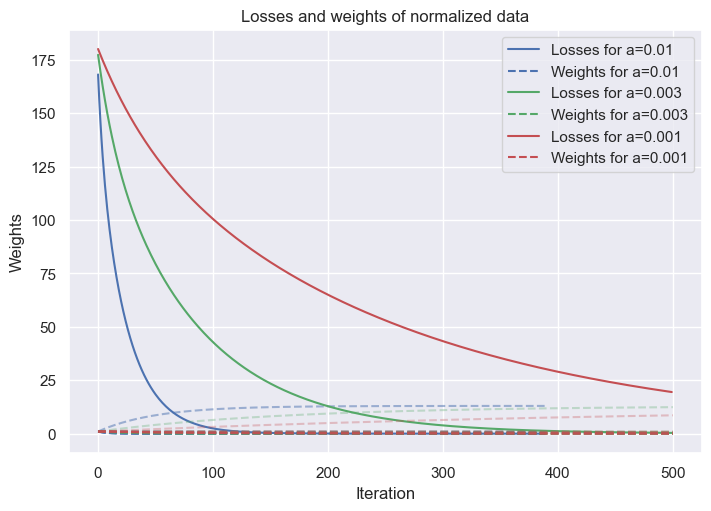

In [1752]:
X = norm(datX.drop(columns=['date', 'sqft_lot', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode'])[:5])
y = np.array([[datY[i]] for i in range (5)])

w_init = np.ones((X.shape[1] + 1, 1))
alpha = 0.01
maxiter = 500
eps = 1e-2

weights, losses = gradDescent(w_init, alpha, X, y, maxiter, eps)

plt.figure(figsize=(7, 5), layout='constrained')
plt.plot(losses, 'b', label='Losses for a=0.01')
plt.plot([], [], 'b--', label='Weights for a=0.01')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'b--', alpha=0.5)

alpha = 0.003
weights, losses = gradDescent(w_init, alpha, X, y, maxiter, eps)
plt.plot(losses, 'g', label='Losses for a=0.003')
plt.plot([], [], 'g--', label='Weights for a=0.003')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'g--', alpha=0.3)

alpha = 0.001
weights, losses = gradDescent(w_init, alpha, X, y, maxiter, eps)
plt.plot(losses, 'r', label='Losses for a=0.001')
plt.plot([], [], 'r--', label='Weights for a=0.001')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'r--', alpha=0.3)

plt.title('Losses and weights of normalized data')
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.legend(loc='upper right')
plt.show()

### Improving our model

Improved solution: if our $\hat{y}>y$ then we will overpay, in the other case, when $\hat{y}<y$ we won't pay anything, because we will not get the house.

Math interpretation:
$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N \begin{cases} a(y_i-\hat{y}_i)^2, \quad y_i>\hat{y}_i \\ b(y_i-\hat{y}_i)^2, \quad y_i\le\hat{y}_i \end{cases}
$$


In [1753]:
def new_loss(w, X, y, a, b):
        
    # Use the same steps as in original loss funciton
    N = X.shape[0]
    additional_x = np.ones((N, 1))
    X_n = np.concatenate([additional_x, X], axis=1)
    y_predicted_i = X_n.dot(w)
    
    # Now we can make our formula for lossValue
    # According to the difference between y and y_predicted
    # First, we define our lossValue
    lossValue = 0
    
    # And add values on every step depending on difference of y and y_predicted
    # Now we don't use sum() because we count each value manually
    for i in range(N):
        if y[i] > y_predicted_i[i]:
            lossValue += 1/N * a * np.power((y[i] - y_predicted_i[i]), 2)
        else:
            lossValue += 1/N * b * np.power((y[i] - y_predicted_i[i]), 2)
    
    # Then divide it by the number of steps to get average values
    lossValue /= N
    
    return lossValue

def new_grad(w_k, X, y, a, b):
    
    # Use the same steps as in original gradient funciton
    N = X.shape[0]
    additional_x = np.ones((N, 1))
    X_n = np.concatenate([additional_x, X], axis=1)
    y_predicted_i = X_n.dot(w_k)
    X_T = np.transpose(X_n)
    
    # Make formula in dependent on the difference between y and y_predicted
    # We need to compare each value of y and y_predicted
    # First, we need to create an empty array
    # I.e. the array of zeros of size of N
    lossGradient = np.zeros(X_n.shape[1])
    
    # And check values in every step
    # Now we don't use matrix multiplication, because we count each value manually
    for i in range(N):
        if y[i] > y_predicted_i[i]:
            lossGradient += -2*a/N * X_n[i] * (y[i] - y_predicted_i[i])
        else:
            lossGradient += -2*b/N * X_n[i] * (y[i] - y_predicted_i[i])

        
    return lossGradient

First, let's make a graident descent function with new_loss and new_grad functions.

In [1754]:
def new_gradDescent(w_init, alpha, X, y, maxiter, eps, a, b):
    
    losses=[]
    weights=[w_init]
    curiter=0
    w_k=weights[-1]
    while curiter < maxiter:
        
        w_k = w_k - alpha * grad(w_k, X, y)
        
        # Here we use our new functions
        lossValue_k = new_loss(w_k, X, y, a, b)
        gradient_loss = new_grad(w_k, X, y, a, b)
        
        weights.append(w_k)
        losses.append(lossValue_k)
        curiter += 1
        
        if np.linalg.norm(gradient_loss) < eps:
            break
        
    return weights, losses

Now let's define our $a$ and $b$. We will take different types of pairs to see what happens.

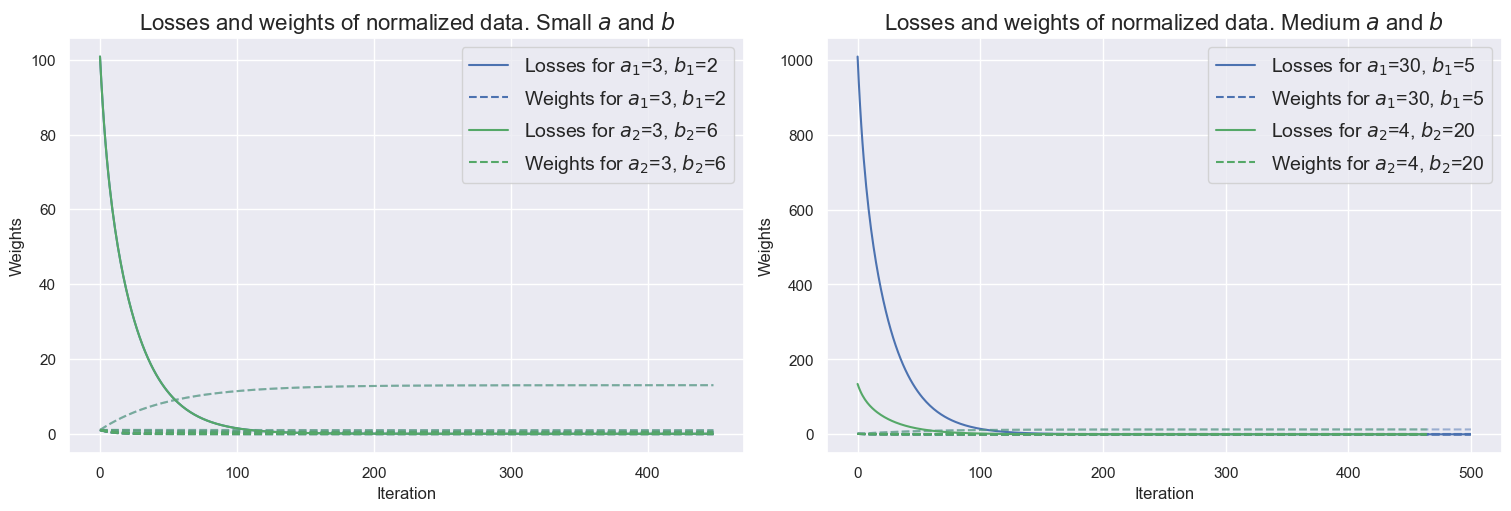

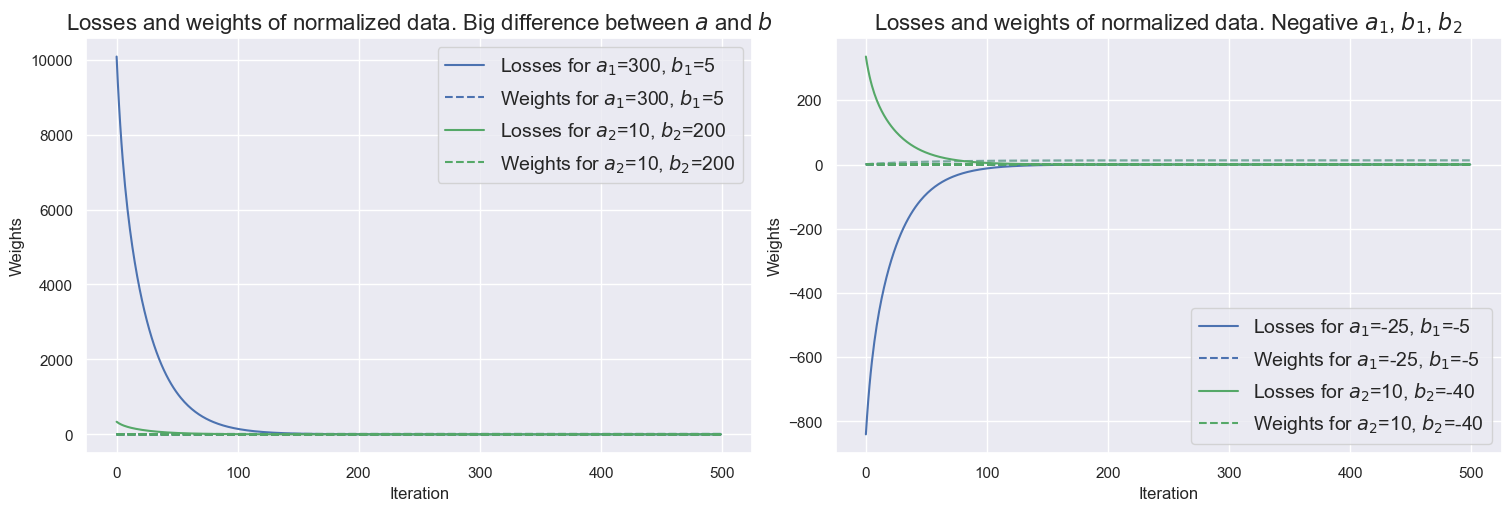

In [1761]:
X = norm(datX.drop(columns=['date', 'sqft_lot', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode'])[:5])
y = np.array([[datY[i]] for i in range (5)])

w_init = np.ones((X.shape[1] + 1, 1))
alpha = 0.01
maxiter = 500
eps = 1e-2

# First, let't take small values that satisfy the condition
# a_1 / b_1 > 1 and a_2 / b_2 < 1
a_1 = 3
b_1 = 2
a_2 = 3
b_2 = 6

# Count our gradient descent for a_1 and b_1
weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_1, b_1)

# And draw some plots
plt.subplots(1, 2, figsize=(15, 5), layout='constrained')
plt.subplot(1, 2, 1)
plt.plot(losses, 'b', label=f'Losses for $a_1$={a_1}, $b_1$={b_1}')
plt.plot([], [], 'b--', label=f'Weights for $a_1$={a_1}, $b_1$={b_1}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'b--', alpha=0.5)

# Now count our gradient descent for a_2 and b_2
weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_2, b_2)  

plt.plot(losses, 'g', label=f'Losses for $a_2$={a_2}, $b_2$={b_2}')
plt.plot([], [], 'g--', label=f'Weights for $a_2$={a_2}, $b_2$={b_2}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'g--', alpha=0.5)

plt.title('Losses and weights of normalized data. Small $a$ and $b$', size=16)
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.legend(loc='upper right', prop={'size': 14})

# Now we take a bit more bigger numbers
a_1 = 30
b_1 = 5
a_2 = 4
b_2 = 20

# Again, count and draw plots
weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_1, b_1)

plt.subplot(1, 2, 2)
plt.plot(losses, 'b', label=f'Losses for $a_1$={a_1}, $b_1$={b_1}')
plt.plot([], [], 'b--', label=f'Weights for $a_1$={a_1}, $b_1$={b_1}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'b--', alpha=0.5)

weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_2, b_2)  

plt.plot(losses, 'g', label=f'Losses for $a_2$={a_2}, $b_2$={b_2}')
plt.plot([], [], 'g--', label=f'Weights for $a_2$={a_2}, $b_2$={b_2}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'g--', alpha=0.5)

plt.title('Losses and weights of normalized data. Medium $a$ and $b$', size=16)
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.legend(loc='upper right', prop={'size': 14})
plt.show()

plt.subplots(1, 2, figsize=(15, 5), layout='constrained')

# What if we take a much bigger difference between numbers?
a_1 = 300
b_1 = 5
a_2 = 10
b_2 = 200

weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_1, b_1)

plt.subplot(1, 2, 1)
plt.plot(losses, 'b', label=f'Losses for $a_1$={a_1}, $b_1$={b_1}')
plt.plot([], [], 'b--', label=f'Weights for $a_1$={a_1}, $b_1$={b_1}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'b--', alpha=0.5)

weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_2, b_2)  

plt.plot(losses, 'g', label=f'Losses for $a_2$={a_2}, $b_2$={b_2}')
plt.plot([], [], 'g--', label=f'Weights for $a_2$={a_2}, $b_2$={b_2}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'g--', alpha=0.5)

plt.title('Losses and weights of normalized data. Big difference between $a$ and $b$', size=16)
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.legend(loc='upper right', prop={'size': 14})

# And what about negative values?
a_1 = -25
b_1 = -5
a_2 = 10
b_2 = -40

weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_1, b_1)

plt.subplot(1, 2, 2)
plt.plot(losses, 'b', label=f'Losses for $a_1$={a_1}, $b_1$={b_1}')
plt.plot([], [], 'b--', label=f'Weights for $a_1$={a_1}, $b_1$={b_1}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'b--', alpha=0.5)

weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_2, b_2)  

plt.plot(losses, 'g', label=f'Losses for $a_2$={a_2}, $b_2$={b_2}')
plt.plot([], [], 'g--', label=f'Weights for $a_2$={a_2}, $b_2$={b_2}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'g--', alpha=0.5)

plt.title('Losses and weights of normalized data. Negative $a_1$, $b_1$, $b_2$', size=16)
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.legend(loc='lower right', prop={'size': 14})
plt.show()

**Conclusions:**
We see, that if we have big difference between $a$ and $b$, then our distance between weights also becomes much smaller. 

Let's try to make the same plots, but change the step. For $alpha$ == 0.03

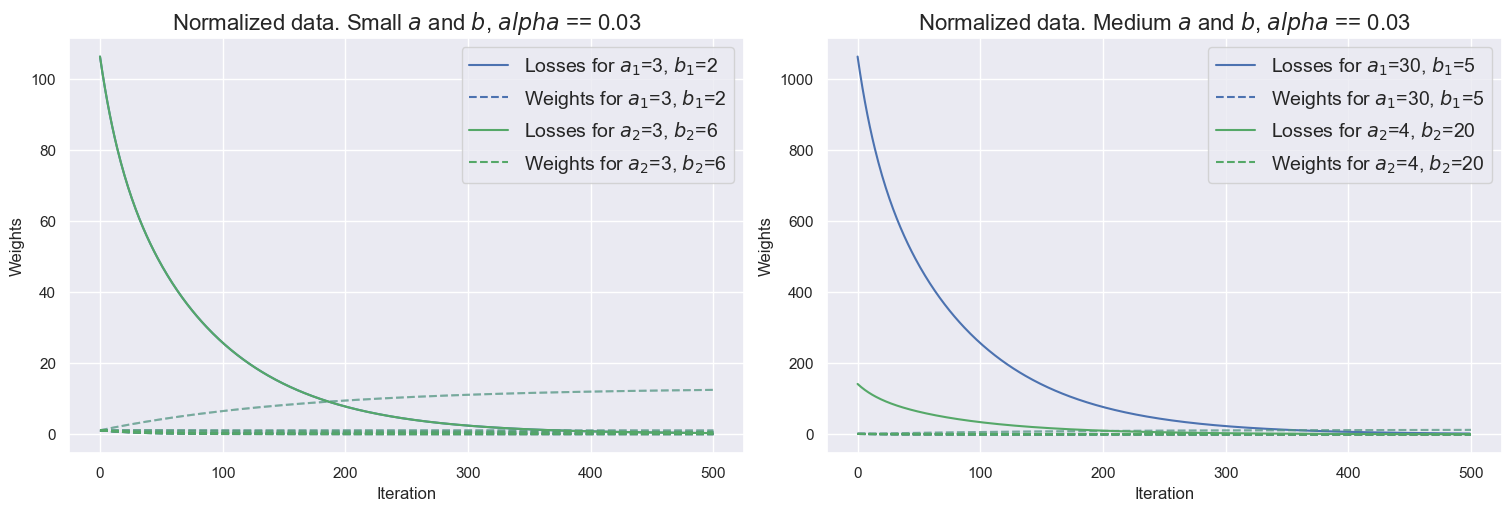

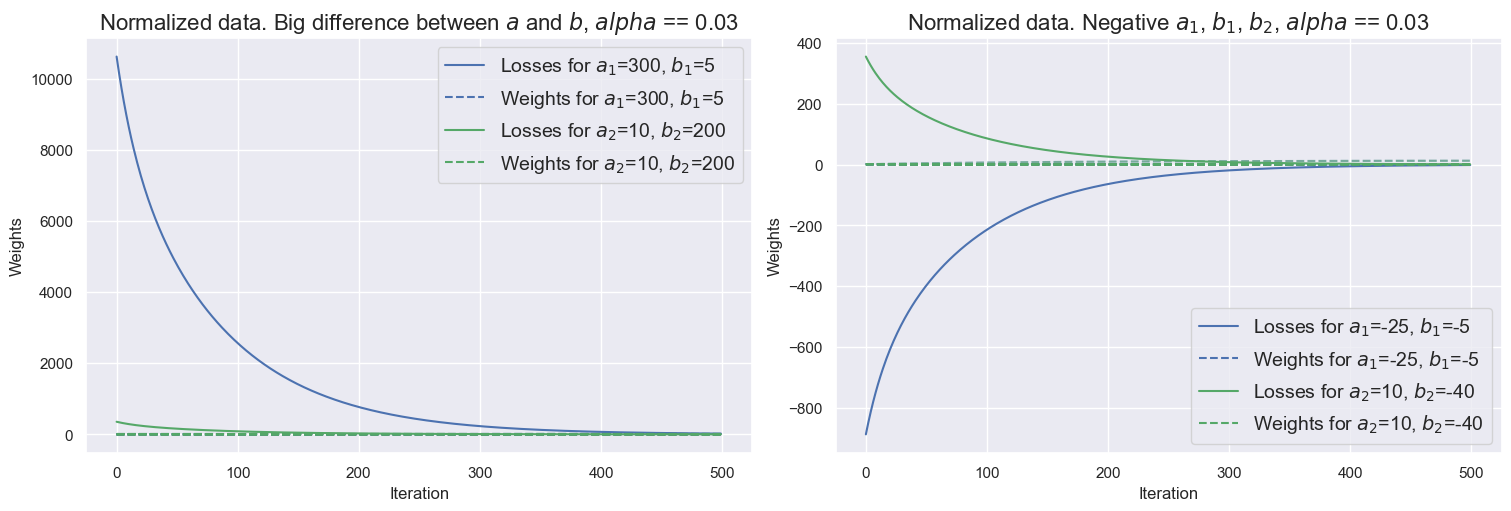

In [1763]:
# Everything the same here, except alpha == 0.03
X = norm(datX.drop(columns=['date', 'sqft_lot', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode'])[:5])
y = np.array([[datY[i]] for i in range (5)])

w_init = np.ones((X.shape[1] + 1, 1))
alpha = 0.003
maxiter = 500
eps = 1e-2

a_1 = 3
b_1 = 2
a_2 = 3
b_2 = 6

weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_1, b_1)

plt.subplots(1, 2, figsize=(15, 5), layout='constrained')
plt.subplot(1, 2, 1)
plt.plot(losses, 'b', label=f'Losses for $a_1$={a_1}, $b_1$={b_1}')
plt.plot([], [], 'b--', label=f'Weights for $a_1$={a_1}, $b_1$={b_1}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'b--', alpha=0.5)

weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_2, b_2)  

plt.plot(losses, 'g', label=f'Losses for $a_2$={a_2}, $b_2$={b_2}')
plt.plot([], [], 'g--', label=f'Weights for $a_2$={a_2}, $b_2$={b_2}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'g--', alpha=0.5)

plt.title('Normalized data. Small $a$ and $b$, $alpha$ == 0.03', size=16)
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.legend(loc='upper right', prop={'size': 14})

a_1 = 30
b_1 = 5
a_2 = 4
b_2 = 20

weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_1, b_1)

plt.subplot(1, 2, 2)
plt.plot(losses, 'b', label=f'Losses for $a_1$={a_1}, $b_1$={b_1}')
plt.plot([], [], 'b--', label=f'Weights for $a_1$={a_1}, $b_1$={b_1}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'b--', alpha=0.5)

weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_2, b_2)  

plt.plot(losses, 'g', label=f'Losses for $a_2$={a_2}, $b_2$={b_2}')
plt.plot([], [], 'g--', label=f'Weights for $a_2$={a_2}, $b_2$={b_2}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'g--', alpha=0.5)

plt.title('Normalized data. Medium $a$ and $b$, $alpha$ == 0.03', size=16)
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.legend(loc='upper right', prop={'size': 14})
plt.show()

plt.subplots(1, 2, figsize=(15, 5), layout='constrained')

a_1 = 300
b_1 = 5
a_2 = 10
b_2 = 200

weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_1, b_1)

plt.subplot(1, 2, 1)
plt.plot(losses, 'b', label=f'Losses for $a_1$={a_1}, $b_1$={b_1}')
plt.plot([], [], 'b--', label=f'Weights for $a_1$={a_1}, $b_1$={b_1}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'b--', alpha=0.5)

weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_2, b_2)  

plt.plot(losses, 'g', label=f'Losses for $a_2$={a_2}, $b_2$={b_2}')
plt.plot([], [], 'g--', label=f'Weights for $a_2$={a_2}, $b_2$={b_2}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'g--', alpha=0.5)

plt.title('Normalized data. Big difference between $a$ and $b$, $alpha$ == 0.03', size=16)
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.legend(loc='upper right', prop={'size': 14})

a_1 = -25
b_1 = -5
a_2 = 10
b_2 = -40

weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_1, b_1)

plt.subplot(1, 2, 2)
plt.plot(losses, 'b', label=f'Losses for $a_1$={a_1}, $b_1$={b_1}')
plt.plot([], [], 'b--', label=f'Weights for $a_1$={a_1}, $b_1$={b_1}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'b--', alpha=0.5)

weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_2, b_2)  

plt.plot(losses, 'g', label=f'Losses for $a_2$={a_2}, $b_2$={b_2}')
plt.plot([], [], 'g--', label=f'Weights for $a_2$={a_2}, $b_2$={b_2}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'g--', alpha=0.5)

plt.title('Normalized data. Negative $a_1$, $b_1$, $b_2$, $alpha$ == 0.03', size=16)
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.legend(loc='lower right', prop={'size': 14})
plt.show()

And for $alpha$ == 0.0001

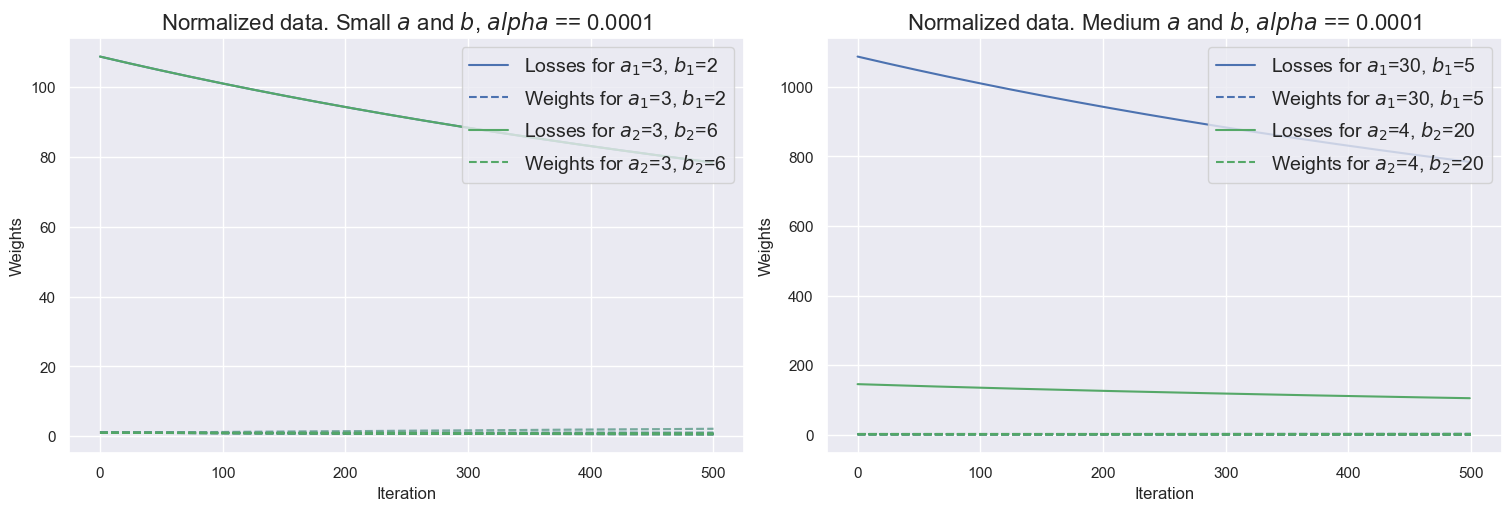

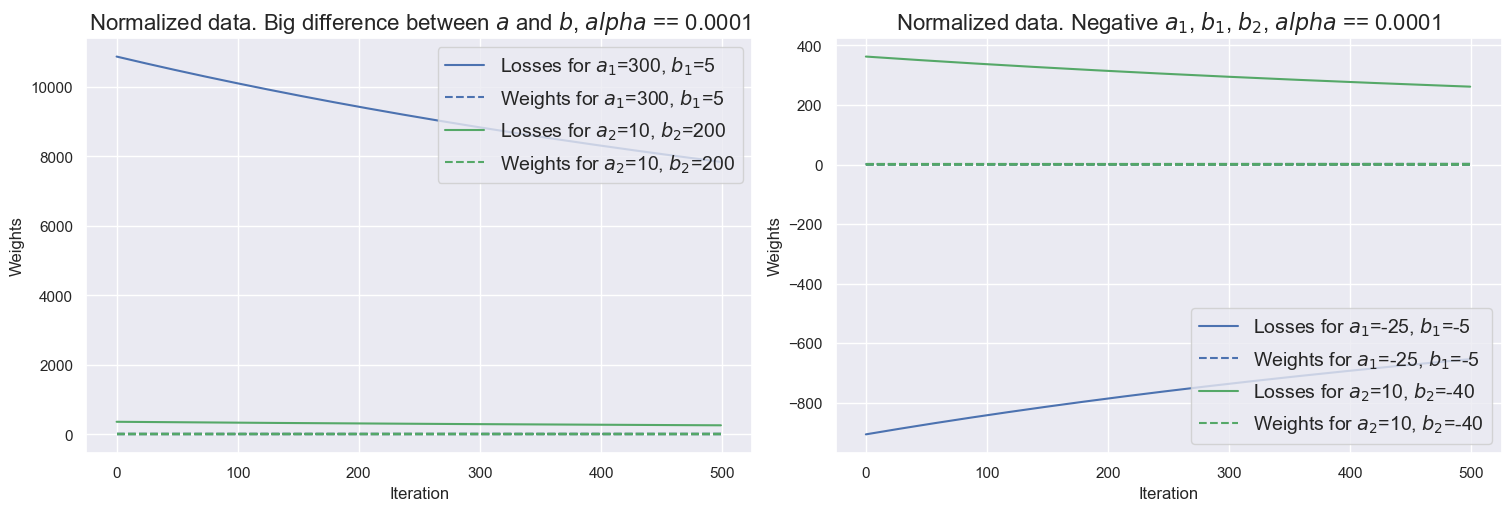

In [1764]:
# Everything the same here, except alpha == 0.0001
X = norm(datX.drop(columns=['date', 'sqft_lot', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode'])[:5])
y = np.array([[datY[i]] for i in range (5)])

w_init = np.ones((X.shape[1] + 1, 1))
alpha = 0.0001
maxiter = 500
eps = 1e-2

a_1 = 3
b_1 = 2
a_2 = 3
b_2 = 6

weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_1, b_1)

plt.subplots(1, 2, figsize=(15, 5), layout='constrained')
plt.subplot(1, 2, 1)
plt.plot(losses, 'b', label=f'Losses for $a_1$={a_1}, $b_1$={b_1}')
plt.plot([], [], 'b--', label=f'Weights for $a_1$={a_1}, $b_1$={b_1}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'b--', alpha=0.5)

weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_2, b_2)  

plt.plot(losses, 'g', label=f'Losses for $a_2$={a_2}, $b_2$={b_2}')
plt.plot([], [], 'g--', label=f'Weights for $a_2$={a_2}, $b_2$={b_2}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'g--', alpha=0.5)

plt.title('Normalized data. Small $a$ and $b$, $alpha$ == 0.0001', size=16)
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.legend(loc='upper right', prop={'size': 14})

a_1 = 30
b_1 = 5
a_2 = 4
b_2 = 20

weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_1, b_1)

plt.subplot(1, 2, 2)
plt.plot(losses, 'b', label=f'Losses for $a_1$={a_1}, $b_1$={b_1}')
plt.plot([], [], 'b--', label=f'Weights for $a_1$={a_1}, $b_1$={b_1}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'b--', alpha=0.5)

weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_2, b_2)  

plt.plot(losses, 'g', label=f'Losses for $a_2$={a_2}, $b_2$={b_2}')
plt.plot([], [], 'g--', label=f'Weights for $a_2$={a_2}, $b_2$={b_2}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'g--', alpha=0.5)

plt.title('Normalized data. Medium $a$ and $b$, $alpha$ == 0.0001', size=16)
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.legend(loc='upper right', prop={'size': 14})
plt.show()

plt.subplots(1, 2, figsize=(15, 5), layout='constrained')

a_1 = 300
b_1 = 5
a_2 = 10
b_2 = 200

weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_1, b_1)

plt.subplot(1, 2, 1)
plt.plot(losses, 'b', label=f'Losses for $a_1$={a_1}, $b_1$={b_1}')
plt.plot([], [], 'b--', label=f'Weights for $a_1$={a_1}, $b_1$={b_1}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'b--', alpha=0.5)

weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_2, b_2)  

plt.plot(losses, 'g', label=f'Losses for $a_2$={a_2}, $b_2$={b_2}')
plt.plot([], [], 'g--', label=f'Weights for $a_2$={a_2}, $b_2$={b_2}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'g--', alpha=0.5)

plt.title('Normalized data. Big difference between $a$ and $b$, $alpha$ == 0.0001', size=16)
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.legend(loc='upper right', prop={'size': 14})

a_1 = -25
b_1 = -5
a_2 = 10
b_2 = -40

weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_1, b_1)

plt.subplot(1, 2, 2)
plt.plot(losses, 'b', label=f'Losses for $a_1$={a_1}, $b_1$={b_1}')
plt.plot([], [], 'b--', label=f'Weights for $a_1$={a_1}, $b_1$={b_1}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'b--', alpha=0.5)

weights, losses = new_gradDescent(w_init, alpha, X, y, maxiter, eps, a_2, b_2)  

plt.plot(losses, 'g', label=f'Losses for $a_2$={a_2}, $b_2$={b_2}')
plt.plot([], [], 'g--', label=f'Weights for $a_2$={a_2}, $b_2$={b_2}')
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], 'g--', alpha=0.5)

plt.title('Normalized data. Negative $a_1$, $b_1$, $b_2$, $alpha$ == 0.0001', size=16)
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.legend(loc='lower right', prop={'size': 14})
plt.show()

### Conclusions

1. The distance between weights becomes sufficiently different with the bigger difference between coefficients $a$ and $b$. Making $b$ a high value and $a$ a small one, we will have more minimum distance between weights, better loss functinos and predictions.

2. We can try to check different values of $b$ to see what are the results that our model provides. After choosing the better variation of $b$, we can try different data and look at predictions, weights and losses. If we are not able to make some experiments (for some reason), we can take something like: $b = a*30$, that provided good results for our case above.
